In [102]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,RobustScaler

In [64]:
datos=pd.read_csv('datos_personas.csv')
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


<H2>Graficando los datos en escala original</H2>

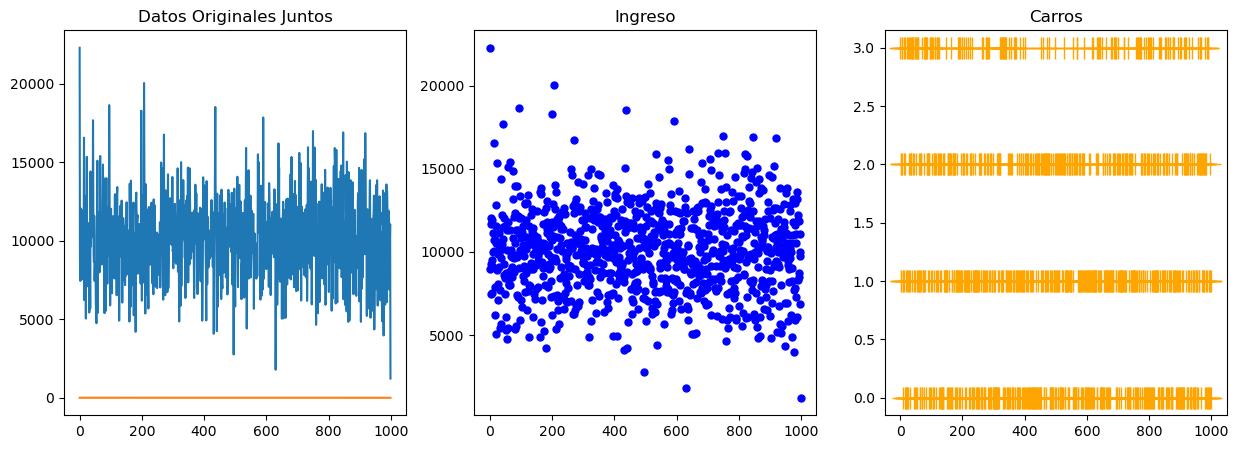

In [65]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title('Datos Originales Juntos')
ax1.plot(datos)
ax2.set_title('Ingreso')
ax2.plot(datos['ingreso'],linewidth=0,marker='o',color='blue',markersize=5)
ax3.set_title('Carros')
ax3.plot(datos['carros'],linewidth=0,marker='+',color='orange',markersize=16)
plt.show()

<H2>Distribucion de  los datos originales</H2>

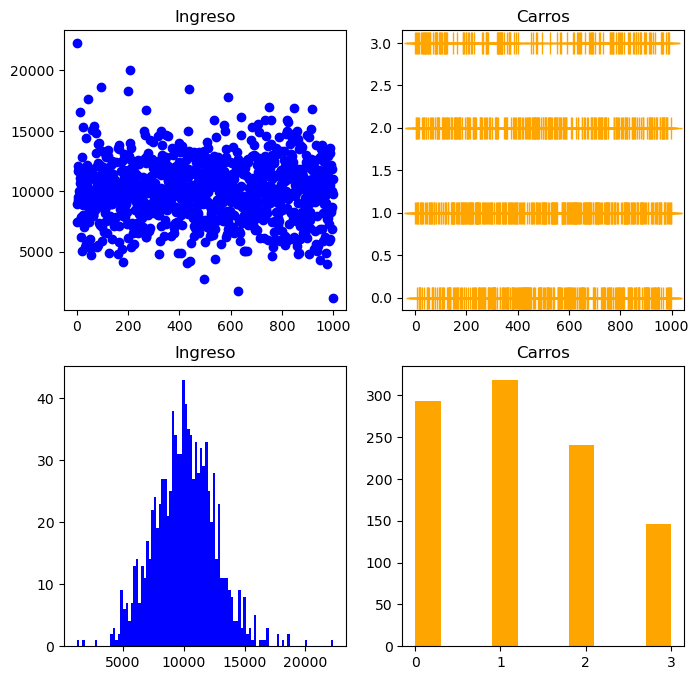

In [80]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.set_title('Ingreso')
ax1.plot(datos['ingreso'],linewidth=0,marker='o',color='blue',markersize=6)
ax2.set_title('Carros')
ax2.plot(datos['carros'],linewidth=0,marker='+',color='orange',markersize=16)
ax3.set_title('Ingreso')
ax3.hist(datos['ingreso'],bins=100,color='blue')
ax4.set_title('Carros')
ax4.hist(datos['carros'],color='orange')
plt.show()

<h4>Lo mismo pero mas profesional</h4>

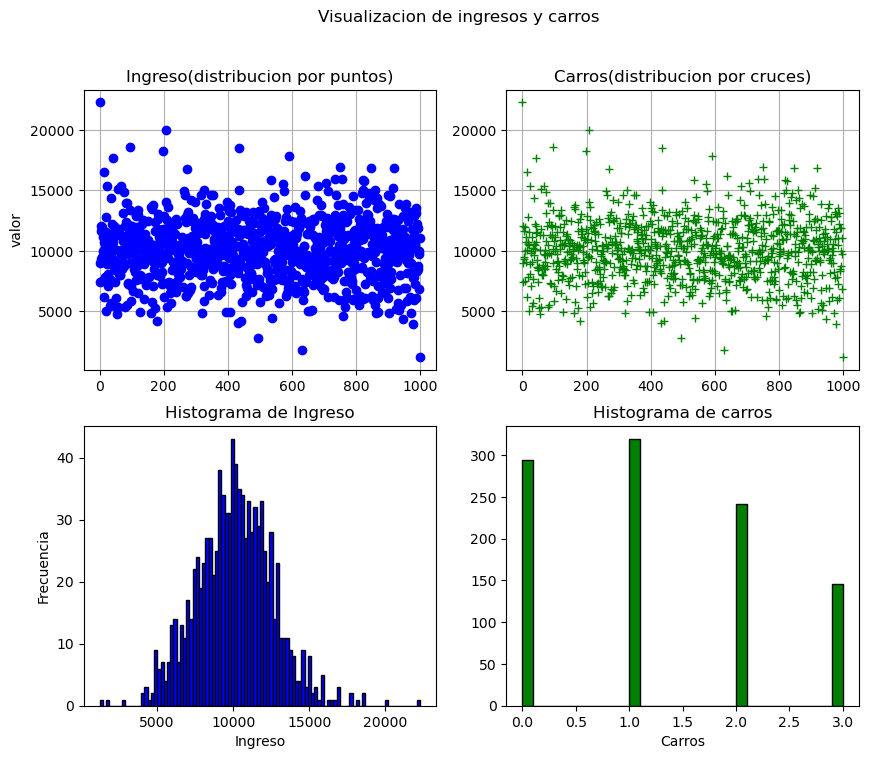

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Visualizacion de ingresos y carros')

#Subgrafico 1: Grafico de dispersion 1 Ingreso
ax[0,0].set_title('Ingreso(distribucion por puntos)')
ax[0,0].plot(datos['ingreso'],linestyle='',marker='o',color='blue',markersize=6)
ax[0,0].set_ylabel('valor')
ax[0,0].grid(True)

#Subgrafico 2: Grafico de dispersion 2 carros
ax[0,1].set_title('Carros(distribucion por cruces)')
ax[0,1].plot(datos['ingreso'],linestyle='',marker='+',color='green',markersize=6)
ax[0,1].grid(True)

#Subgrafico 3: Histograma de ingreso
ax[1,0].set_title('Histograma de Ingreso')
ax[1,0].hist(datos['ingreso'],bins=100,color='blue',edgecolor='black')
ax[1,0].set_xlabel('Ingreso')
ax[1,0].set_ylabel('Frecuencia')

#Subgrafico 4: Histograma de carros
ax[1,1].set_title('Histograma de carros')
ax[1,1].hist(datos['carros'],bins=30,color='green',edgecolor='black')
ax[1,1].set_xlabel('Carros')

plt.show()

<h2>Tecnicas para homogenizacion</h2>

<h3>Escala en funcion del minimo y maximo: MinMaxScaler()</h3>
<p><B>MinMaxScaler:</B> Ideal cuando necesitas escalar datos a un rango fijo, entre 0 y 1. Es ideal cuando no hay outliers.</p>

In [240]:
#Creamos el Scaler
scaler=MinMaxScaler()

datos_min_max=scaler.fit_transform(datos)
datos_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

<h3>Normalizacion en funcion del Vector Normalizer()</h3>


<h3>Normalizacion en funcion del Vector Normalizer()</h3>
<p><b>Normalizer:</b> Se aplica cuando quieras normalizar cada muestra para que su longitud sea 1. Util en modelos basados en distancia como KNN y clustering.</p>

In [241]:
normalizer=Normalizer()
datos_normalizados=normalizer.transform(datos.T).T
datos_normalizados

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

<h3>Estandarizacion (desv_std=1, mean=0): StandardScaler()</h3>
<p><b>estandarizado=(X - media) / std</p>
<p><b>EstandardScaler:</b>Se utiliza cuando los datos tienen una distribucion cercana a la normal. Escala las caracteristicas para que tengan una media de 0 y una desviacion standard de 1. Comun en regresion y SVM</p>

In [242]:
standard=StandardScaler()
datos_standard=standard.fit_transform(datos)
datos_standard

array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

<h3>Estandarizacion con RobustScaler()</h3>
<p><b>estandarizado = (X - rango_intercuartilico) / std</p>
<p><b>RobustScaler:</b> Mejor opcion cuando hay muchos outliers, ya que usa el rango intercuartilico que deja la los outliers fuera de la operacion y que no afecten al resultado</p>

In [243]:
robust=RobustScaler()
datos_robust=robust.fit_transform(datos)
datos_robust

array([[ 3.70548334,  1.        ],
       [-0.3376601 ,  0.        ],
       [-0.80023109,  0.5       ],
       ...,
       [-0.09575781,  0.        ],
       [ 0.29496225,  0.        ],
       [-2.68800607, -0.5       ]])